# Plotting the narrative arc of a story

This is an attempt to replicate the approach of [Boyd et al. (2020)](https://www.science.org/doi/10.1126/sciadv.aba2196) based on the [narrative arc category dictionaries](https://osf.io/2ztvq/?view_only=3ec61cf65c08476f926624893d0d6fc3) shared on OSF. 

**COLAB NOTEBOOK VERSION:** To run this notebook in CoLab, please [click here](https://colab.research.google.com/github/senthilchandrasegaran/words-as-images/blob/main/narrative-analysis.ipynb).

In [1]:
## Uncomment the below lines if needed.
# !pip install pandas
# !pip install seaborn
# !pip install nltk

In [2]:
import re
import nltk
import math
import pandas as pd
import seaborn as sns
from nltk import word_tokenize

# nltk.download('punkt_tab')  # comment this line after the first time you run this code.

## Insert story here.
You can copy-paste your own story to replace the text below.

**NOTE:**
Please take care not to delete the quotation marks (`"""`) above and below the text.

In [3]:
story_text = """

Once upon a time there was a dear little girl who was loved by everyone
who looked at her, but most of all by her grandmother, and there was
nothing that she would not have given to the child. Once she gave her a
little cap of red velvet, which suited her so well that she would never
wear anything else; so she was always called ‘Little Red-Cap.’

One day her mother said to her: ‘Come, Little Red-Cap, here is a piece
of cake and a bottle of wine; take them to your grandmother, she is ill
and weak, and they will do her good. Set out before it gets hot, and
when you are going, walk nicely and quietly and do not run off the path,
or you may fall and break the bottle, and then your grandmother will
get nothing; and when you go into her room, don’t forget to say, “Good
morning”, and don’t peep into every corner before you do it.’

‘I will take great care,’ said Little Red-Cap to her mother, and gave
her hand on it.

The grandmother lived out in the wood, half a league from the village,
and just as Little Red-Cap entered the wood, a wolf met her. Red-Cap
did not know what a wicked creature he was, and was not at all afraid of
him.

‘Good day, Little Red-Cap,’ said he.

‘Thank you kindly, wolf.’

‘Whither away so early, Little Red-Cap?’

‘To my grandmother’s.’

‘What have you got in your apron?’

‘Cake and wine; yesterday was baking-day, so poor sick grandmother is to
have something good, to make her stronger.’

‘Where does your grandmother live, Little Red-Cap?’

‘A good quarter of a league farther on in the wood; her house stands
under the three large oak-trees, the nut-trees are just below; you
surely must know it,’ replied Little Red-Cap.

The wolf thought to himself: ‘What a tender young creature! what a nice
plump mouthful--she will be better to eat than the old woman. I must
act craftily, so as to catch both.’ So he walked for a short time by
the side of Little Red-Cap, and then he said: ‘See, Little Red-Cap, how
pretty the flowers are about here--why do you not look round? I believe,
too, that you do not hear how sweetly the little birds are singing; you
walk gravely along as if you were going to school, while everything else
out here in the wood is merry.’

Little Red-Cap raised her eyes, and when she saw the sunbeams dancing
here and there through the trees, and pretty flowers growing everywhere,
she thought: ‘Suppose I take grandmother a fresh nosegay; that would
please her too. It is so early in the day that I shall still get there
in good time’; and so she ran from the path into the wood to look for
flowers. And whenever she had picked one, she fancied that she saw a
still prettier one farther on, and ran after it, and so got deeper and
deeper into the wood.

Meanwhile the wolf ran straight to the grandmother’s house and knocked
at the door.

‘Who is there?’

‘Little Red-Cap,’ replied the wolf. ‘She is bringing cake and wine; open
the door.’

‘Lift the latch,’ called out the grandmother, ‘I am too weak, and cannot
get up.’

The wolf lifted the latch, the door sprang open, and without saying a
word he went straight to the grandmother’s bed, and devoured her. Then
he put on her clothes, dressed himself in her cap laid himself in bed
and drew the curtains.

Little Red-Cap, however, had been running about picking flowers,
and when she had gathered so many that she could carry no more, she
remembered her grandmother, and set out on the way to her.

She was surprised to find the cottage-door standing open, and when she
went into the room, she had such a strange feeling that she said to
herself: ‘Oh dear! how uneasy I feel today, and at other times I like
being with grandmother so much.’ She called out: ‘Good morning,’ but
received no answer; so she went to the bed and drew back the curtains.
There lay her grandmother with her cap pulled far over her face, and
looking very strange.

‘Oh! grandmother,’ she said, ‘what big ears you have!’

‘The better to hear you with, my child,’ was the reply.

‘But, grandmother, what big eyes you have!’ she said.

‘The better to see you with, my dear.’

‘But, grandmother, what large hands you have!’

‘The better to hug you with.’

‘Oh! but, grandmother, what a terrible big mouth you have!’

‘The better to eat you with!’

And scarcely had the wolf said this, than with one bound he was out of
bed and swallowed up Red-Cap.

When the wolf had appeased his appetite, he lay down again in the bed,
fell asleep and began to snore very loud. The huntsman was just passing
the house, and thought to himself: ‘How the old woman is snoring! I must
just see if she wants anything.’ So he went into the room, and when he
came to the bed, he saw that the wolf was lying in it. ‘Do I find you
here, you old sinner!’ said he. ‘I have long sought you!’ Then just as
he was going to fire at him, it occurred to him that the wolf might have
devoured the grandmother, and that she might still be saved, so he did
not fire, but took a pair of scissors, and began to cut open the stomach
of the sleeping wolf. When he had made two snips, he saw the little
Red-Cap shining, and then he made two snips more, and the little girl
sprang out, crying: ‘Ah, how frightened I have been! How dark it was
inside the wolf’; and after that the aged grandmother came out alive
also, but scarcely able to breathe. Red-Cap, however, quickly fetched
great stones with which they filled the wolf’s belly, and when he awoke,
he wanted to run away, but the stones were so heavy that he collapsed at
once, and fell dead.

Then all three were delighted. The huntsman drew off the wolf’s skin and
went home with it; the grandmother ate the cake and drank the wine which
Red-Cap had brought, and revived, but Red-Cap thought to herself: ‘As
long as I live, I will never by myself leave the path, to run into the
wood, when my mother has forbidden me to do so.’


It also related that once when Red-Cap was again taking cakes to the old
grandmother, another wolf spoke to her, and tried to entice her from the
path. Red-Cap, however, was on her guard, and went straight forward on
her way, and told her grandmother that she had met the wolf, and that he
had said ‘good morning’ to her, but with such a wicked look in his eyes,
that if they had not been on the public road she was certain he would
have eaten her up. ‘Well,’ said the grandmother, ‘we will shut the door,
that he may not come in.’ Soon afterwards the wolf knocked, and cried:
‘Open the door, grandmother, I am Little Red-Cap, and am bringing you
some cakes.’ But they did not speak, or open the door, so the grey-beard
stole twice or thrice round the house, and at last jumped on the roof,
intending to wait until Red-Cap went home in the evening, and then to
steal after her and devour her in the darkness. But the grandmother
saw what was in his thoughts. In front of the house was a great stone
trough, so she said to the child: ‘Take the pail, Red-Cap; I made some
sausages yesterday, so carry the water in which I boiled them to the
trough.’ Red-Cap carried until the great trough was quite full. Then the
smell of the sausages reached the wolf, and he sniffed and peeped down,
and at last stretched out his neck so far that he could no longer keep
his footing and began to slip, and slipped down from the roof straight
into the great trough, and was drowned. But Red-Cap went joyously home,
and no one ever did anything to harm her again.

"""

## Dictionary categories
The narrative arc is calculated along three dimensions---staging, plot progression, and cognitive tension. The terms belonging under each dimension is written as a separate dictionary category below.

In [4]:
staging_terms = ['a', 'about', 'above', 'abt', 'across', 'after', 'against', 'ahead', 'along', 'amid', 'amidst', 'among*', 'an', 'around', 'as', 'at', 'atop', 'away', 'before', 'behind', 'below', 'beneath', 'beside', 'besides', 'between', 'beyond', 'by', 'despite', 'down', 'during', 'except', 'for', 'from', 'hereafter', 'in', 'including', 'inside', 'insides', 'into', 'minus', 'near', 'of', 'off', 'on', 'onto', 'out', 'outside', 'over', 'plus', 'regarding', 'respecting', 'sans', 'since', 'than', 'the', 'through*', 'thru', 'til', 'till', 'to', 'toward*', 'under', 'underneath', 'unless', 'unlike', 'until', 'unto', 'up', 'upon', 'versus', 'via', 'vs', 'with', 'within', 'without']

In [5]:
plot_progression_terms = ['absolutely', 'actually', 'again', 'aint', "ain't", 'all', 'almost', 'already', 'also', 'alternatively', 'altho', 'although', 'altogether', 'always', 'am', 'and', 'another', 'any', 'anybod*', 'anyhow', 'anymore', 'anyone*', 'anything', 'anytime', 'anyway*', 'anywhere', 'apparently', 'are', 'arent', "aren't", 'awhile', 'back', 'barely', 'basically', 'bc', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'being', 'briefly', 'but', 'can', 'cannot', 'cant', "can't", 'certainly', 'clearly', 'commonly', 'completely', 'constantly', 'continually', 'cos', 'could', 'couldnt', "couldn't", 'couldve', "could've", 'coz', 'cuz', 'deez', 'definitely', 'did', 'didnt', "didn't", 'do', 'does', 'doesnt', "doesn't", 'doing', 'done', 'dont', "don't", 'either', 'else', 'especially', 'essentially', 'even', 'eventually', 'ever', 'everybod*', 'everyday', 'everyone*', 'everything*', 'everytime', 'everywhere*', 'exclusively', 'extremely', 'fairly', 'finally', 'forever', 'fortunately', 'frankly', 'frequently', 'fully', 'fundamentally', 'generally', 'gunna', 'had', 'hadnt', "hadn't", 'hardly', 'has', 'hasnt', "hasn't", 'have', 'havent', "haven't", 'having', 'he', "he'd", 'hence', 'henceforth', 'her', 'here', 'herein', 'heres', "here's", 'hereto*', 'hers', 'herself', 'hes', "he's", 'him', 'himself', 'his', 'hissel*', 'hopefully', 'how', 'howd', "how'd", 'however', 'howre', "how're", 'hows', "how's", 'i', 'id', "i'd", 'idc', 'idgaf', 'idk', 'idontknow', 'idve', "i'd've", 'if', 'ikr', "i'll", 'ily*', 'im', "i'm", 'ima', 'imean', 'imma', 'immediately', 'indeed', 'instead', 'is', 'isnt', "isn't", 'it', 'itd', "it'd", 'itll', "it'll", 'its', "it's", 'itself', 'ive', "i've", 'jus', 'just', 'juz', 'lately', 'let', 'lets', "let's", 'mainly', 'may', 'maybe', 'me', 'meanwhile', 'methinks', 'might', 'mightve', "might've", 'mine', 'most', 'mostly', 'must', 'mustnt', "mustn't", "must'nt", 'mustve', "must've", 'my', 'myself', 'nah*', 'namely', 'nearly', 'neednt', "needn't", "need'nt", 'negat*', 'neither', 'never', 'nevertheless', 'no', 'nobod*', 'noes', 'none', 'nonetheless', 'nope', 'nor', 'normally', 'not', 'nothing', 'notwithstanding', 'now', 'nowhere', 'np', 'obviously', 'often', 'oneself', 'only', 'or', 'originally', 'other', 'others', 'otherwise', 'ought', 'oughta', 'oughtnt', "oughtn't", "ought'nt", 'oughtve', "ought've", 'our', 'ours', 'ourselves', 'particularly', 'perhaps', 'possibily', 'potentially', 'practically', 'presently', 'presumedly', 'presumingly', 'primarily', 'principally', 'probably', 'prolly', 'quite', 'randomly', 'rarely', 'rather', 'really', 'regardless', 'regularly', 'relatively', 'respectively', 'seldomly', 'separately', 'seriously', 'shall', 'shant', "shan't", 'she', "she'd", "she'll", 'shes', "she's", 'shortly', 'should', 'shouldnt', "shouldn't", "should'nt", 'shouldve', "should've", 'simply', 'so', 'some', 'somebod*', 'someday', 'somehow', 'someone*', 'something*', 'sometime', 'sometimes', 'somewhat', 'somewhere', 'soon', 'sooo*', 'specifically', 'still', 'stuff', 'subsequently', 'such', 'suddenly', 'supposedly', 'surely', 'that', 'thatd', "that'd", 'thatll', "that'll", 'thats', "that's", 'thee', 'their*', 'them', 'themself', 'themselves', 'then', 'there', 'thereafter', 'therefor*', 'theres', "there's", 'these', 'they', 'theyd', "they'd", 'theyll', "they'll", 'theyre', "they're", 'theyve', "they've", 'thine', 'thing*', 'this', 'tho', "tho'", 'those', 'thou', 'though', 'thoust', 'thus*', 'thy', 'thyself', 'too', 'totally', 'truly', 'tryna', 'typically', 'u', 'uh-uh', 'ultimately', 'unable', 'uncommonly', 'ur', 'us', 'usually', 'vastly', 'very', 'virtually', 'visibly', 'wanna', 'was', 'wasnt', "wasn't", 'we', "we'd", 'well', "we'll", 'were', "we're", 'werent', "weren't", 'weve', "we've", 'what', 'whatd', "what'd", 'whatever', 'whatll', "what'll", 'whats', "what's", 'when', "when'*", 'whence', 'whenever', 'where', 'whereas', 'whereby', "where'd", 'wherefore', 'wherein', 'whereof', 'wherever', 'whether', 'which', 'whichever', 'while', 'whilst', 'whither', 'who', 'whod', "who'd", 'whoever', 'wholl', "who'll", 'wholly', 'whom', 'whomever', 'whos', "who's", 'whose', 'whosever', 'whoso*', 'why', "why'*", 'whyever', 'will', 'wont', "won't", 'would', 'wouldnt', "wouldn't", 'wouldve', "would've", 'ya', 'yall', "y'all", "ya'll*", 'yalls', "y'all's", 'ye', 'yet', 'yinz*', 'you', 'youd', "you'd", 'youll', "you'll", 'your', 'youre', "you're", 'yours', 'yourself', 'yourselves', 'youve', "you've"]

In [6]:
cognitive_tension_terms = ['abnormal*', 'acknowledg*', 'actually', 'adjust*', 'admit', 'admits', 'admitted', 'admitting', 'affect', 'affected', 'affecting', 'affects', 'afterthought*', 'also', 'alternate', 'alternative', 'alternatively', 'alternatives', 'altho', 'although', 'ambigu*', 'analy*', 'answer*', 'apparent', 'apparently', 'apprehens*', 'approximat*', 'arbitrar*', 'assess*', 'assum*', 'assur*', 'attent*', 'attribut*', 'aware*', 'based', 'basically', 'basis', 'bc', 'because', 'belief*', 'believe', 'believed', 'believes', 'believing', 'brain*', 'but', 'calcul*', 'categor*', 'caus*', 'certain', 'certainly', 'choice*', 'choos*', 'clarif*', 'clue', 'cogniz*', 'cohere*', 'compel*', 'complex', 'complexity', 'complicat*', 'compreh*', 'concentrat*', 'conclud*', 'conclus*', 'confuse', 'confused', 'confuses', 'confusing', 'confusion*', 'conjectur*', 'conscious*', 'consequen*', 'consider', 'consideration', 'considered', 'considering', 'considers', 'contemplat*', 'contingen*', 'convinc*', 'correct*', 'correlat*', 'cos', 'coz', 'creativ*', 'curio*', 'cuz', 'decide', 'decided', 'decides', 'deciding', 'decis*', 'deduc*', 'deem*', 'define', 'defined', 'defines', 'defining', 'definite', 'definitely', 'definition', 'definitive*', 'desir*', 'despite', 'detect', 'detected', 'detection', 'detects', 'determine', 'determined', 'determines', 'determining', 'diagnos*', 'differentiat*', 'disbelie*', 'discern*', 'discover*', 'disillusion*', 'disorient*', 'distinguish*', 'distract*', 'doubt*', 'dubious*', 'dunno', 'effect*', 'either', 'else', 'enlighten*', 'essentially', 'estim*', 'evaluat*', 'evidence', 'evident*', 'examin*', 'except', 'exception', 'exceptions', 'expect*', 'experiment*', 'explain', 'explained', 'explaining', 'explains', 'explanat*', 'explicit*', 'explor*', 'fact', 'factor', 'facts', 'factual*', 'false*', 'feasible', 'feel', 'feeling', 'feelings', 'feels', 'felt', 'find', 'finding', 'findings', 'finds', 'foresee*', 'foresight*', 'forget*', 'forgot*', 'found', 'frankly', 'fundamental', 'fundamentally', 'fundamentals', 'generaliz*', 'generally', 'guess', 'guessed', 'guesses', 'guessing', 'guesstimat*', 'heed*', 'hesita*', 'hypothes*', 'hypothetic*', 'idea', 'ideal*', 'ideas', 'ideat*', 'identif*', 'idk', 'ignor*', 'ikr', 'imagin*', 'implica*', 'implicit*', 'implie*', 'imply*', 'impossible', 'indecis*', 'indeed', 'induc*', 'inevitab*', 'infer', 'inferen*', 'inferr*', 'infers', 'info', 'inform', 'information*', 'informative*', 'informed', 'informing', 'informs', 'inquir*', 'inscrut*', 'insight*', 'inspir*', 'instead', 'intend*', 'intent*', 'interpret*', 'irrefu*', 'justif*', 'kind of', 'kinda', 'kindof', 'kinds', 'knew', 'know', 'knowab*', 'knowing', 'knowledg*', 'known', 'knows', 'learn', 'learned', 'learner', 'learners', 'learning', 'learns', 'learnt', 'lesson*', 'likel*', 'logic*', 'mainly', 'may', 'maybe', 'meaning*', 'means', 'meant', 'meanwhile', 'meditat*', 'memorabl*', 'memories', 'memoris*', 'memoriz*', 'memory', 'methinks', 'mindful*', 'minus', 'mistak*', 'misunder*', 'myster*', 'namely', 'nevertheless', 'nonetheless', 'nor', 'notice', 'noticed', 'notices', 'noticing', 'obscur*', 'obvious', 'obviously', 'obviousness', 'odd', 'odder', 'oddest', 'opinion*', 'otherwise', 'outcome*', 'perhaps', 'plan', 'planned', 'planning', 'plans', 'ponder*', 'possibily', 'possible', 'potentially', 'predict*', 'presume', 'presumed', 'presumedly', 'presumes', 'presuming', 'presumingly', 'presumption*', 'presupp*', 'pretend*', 'probabil*', 'probable', 'probably', 'problem*', 'prolly', 'proof*', 'prove*', 'proving', 'provok*', 'purpose*', 'puzzl*', 'quer*', 'question', 'questioned', 'questioning', 'questions', 'random', 'randomly', 'randomness', 'rational*', 'realization*', 'realize', 'realized', 'realizes', 'realizing', 'reason*', 'recall*', 'reckon*', 'recogni*', 'recollect*', 'reconsider*', 'reevaluat*', 'regarding', 'regardless', 'remember', 'remembered', 'remembering', 'remembers', 'resolu*', 'resolv*', 'respective', 'respectively', 'result*', 'rethink*', 'revelat*', 'ruminat*', 'sans', 'savvy', 'scrut*', 'secret', 'secretive', 'secretively', 'secrets', 'seem', 'seemed', 'seeming*', 'seems', 'sense', 'sensed', 'senses', 'sensing', 'separately', 'since', 'skeptic*', 'solution*', 'solve', 'solved', 'solves', 'solving', 'somehow', 'sorta', 'sortof', 'sorts', 'sortsa', 'sought', 'specific', 'specifically', 'specifics', 'specify', 'spose', "s'pose", 'studied', 'studies', 'study', 'studying', 'suppose', 'supposed', 'supposes', 'supposing', 'supposition*', 'sure', 'surely', 'surmis*', 'suspect*', 'suspicio*', 'tentativ*', 'than', 'theor*', 'think', 'thinker*', 'thinking', 'thinks', 'thought', 'thoughtf*', 'thoughts', 'trick', 'tricked', 'trickier', 'trickiest', 'tricks', 'tricky', 'true', 'truest', 'truth*', 'unambigu*', 'unaware*', 'uncertain*', 'unclear*', 'undecided*', 'undeniab*', 'understand', 'understandab*', 'understanding*', 'understands', 'understood', 'undetermin*', 'undoubt*', 'unknowing', 'unknowingly', 'unknown', 'unlikel*', 'unquestion*', 'unresolv*', 'unsure*', 'vague', 'vaguely', 'vagueness', 'vaguer', 'vaguest', 'variab*', 'varied', 'varies', 'vary', 'wisdom', 'wise', 'wisely', 'wiser', 'wisest', 'wonder', 'wondered', 'wondering', 'wonders']

## Computing category scores
The functions below can be used to compute category scores as we have done so far in this course, i.e., count the number of matches between a given text and the terms in a given category, and divide this number by the total number of words in the text.

In [7]:
def count_matches(text, pattern):
    if pattern.startswith('*') :
        pattern = r"[A-Za-z]*" + pattern[1:]
        
    if pattern.endswith('*') :
        pattern = pattern[:-1] + r"[A-Za-z]*'"
    
    m = r"\b" + pattern + r"\b"
    matches = re.findall(pattern, text)
    return len(matches)
    
def get_category_score(story_segment, category_term_list):
    # Count the total number of times any word from the dictionary appears in the transcript
    term_counts = 0
    for dict_term in category_term_list :
        term_counts += count_matches(story_segment.lower(), dict_term)
    
    # Count the total words in the transcript
    tokens = word_tokenize(story_segment)
    word_count = len(tokens)
    
    # Compute dictionary category score
    category_score = term_counts/word_count
    return category_score

## Arc of Narrative
The function below divides a given story into a number of specified segments (recommended value: 5), and computes the scores for each of the categories of staging, plot progression, and cognitive tension for each segment. Results are output as a dataframe.

In [8]:
def get_AON_results(story_text, num_segments=5, 
                    staging_terms=staging_terms, 
                    plot_progression_terms=plot_progression_terms, 
                    cognitive_tension_terms=cognitive_tension_terms):
    
    tokens = word_tokenize(story_text.lower())
    story_length = len(tokens)
    segment_length = math.ceil(story_length/num_segments)
    segment_index = segment_length-1
    
    # create an empty list of results to which we will add the results segment-by-segment
    segment_results = []

    # iterate over the segments
    for ind in range(num_segments) :

        # Get the "segment" of the story corresponding to the index
        story_segment = " ".join(tokens[segment_length*ind:segment_length*(ind+1)])
        
        # Compute the staging score, i.e., count the number of words in the story segment that
        # match with the words from the category,divided by the total words in the text segment
        staging_score = get_category_score(story_segment, staging_terms)

        # Repeat this process for the other two categories
        plot_progression_score = get_category_score(story_segment, plot_progression_terms)
        cognitive_tension_score = get_category_score(story_segment, cognitive_tension_terms)

        # Create a JSON-like result format for each segment
        segment_result = { 'segment' : ind+1 ,
                           'staging' : staging_score ,
                           'plot progression' : plot_progression_score,
                           'cognitive tension' : cognitive_tension_score }

        # Add the result for this segment to the empty list created earlier
        segment_results.append(segment_result)

    # Convert the list of results into a dataframe
    df = pd.json_normalize(segment_results)
    return df

# Calling the function
To compute the category score for your story, call the above function and pass to it your story text, and input the number of segments (optional). If no segments are input, the default of 5 is taken as an argument.

In [9]:
results_df = get_AON_results(story_text, num_segments=5)

In [10]:
results_df

,segment,staging,plot progression,cognitive tension
0,1,0.637427,0.961988,0.014620
1,2,0.615836,0.961877,0.029326
2,3,0.646199,0.988304,0.032164
3,4,0.664706,0.952941,0.035294
4,5,0.732938,0.958457,0.023739


## Standardizing the scores

As you can see above, some category scores end up being much lower than others, given the nature of the category itself and the number of words in a story that fit that category. To bring each category to the same scale of 0-100, we can apply a [min-max normalization](https://en.wikipedia.org/wiki/Feature_scaling#Rescaling_(min-max_normalization)) to the values. We do this below.

In [11]:
def minmax_norm(val, min_val, max_val):
    norm = (val-min_val)/(max_val-min_val) *100
    return norm

# There is a more elegant way of achieving the below function, but I got lazy.
def standardize_scores(df):
    staging_min = df["staging"].min()
    staging_max = df["staging"].max()
    df["staging"] = df.apply(lambda x: minmax_norm(x['staging'], staging_min, staging_max), axis=1)
    plotprog_min = df["plot progression"].min()
    plotprog_max = df["plot progression"].max()
    df["plot progression"] = df.apply(lambda x: minmax_norm(x['plot progression'], plotprog_min, plotprog_max), axis=1)
    cogtens_min = df["cognitive tension"].min()
    cogtens_max = df["cognitive tension"].max()
    df["cognitive tension"] = df.apply(lambda x: minmax_norm(x['cognitive tension'], cogtens_min, cogtens_max), axis=1)
    return df

In [12]:
norm_results_df = standardize_scores(results_df.copy())
norm_results_df

,segment,staging,plot progression,cognitive tension
0,1,18.437892,25.583658,0.000000
1,2,0.000000,25.268437,71.130228
2,3,25.928743,100.000000,84.858569
3,4,41.732971,0.000000,100.000000
4,5,100.000000,15.597686,44.107990


## Plotting the narrative arc
We can now plot the "narrative arc" for each category to see how it rises and falls over each successive segment. To do this, we need to make a few changes to the table format first...

In [13]:
results_plot_df = pd.melt(norm_results_df, id_vars=["segment"], value_vars=["staging", "plot progression", "cognitive tension"])
results_plot_df = results_plot_df.rename(columns={"variable" : "category", "value" : "score"})
results_plot_df.sample(5)

,segment,category,score
12,3,cognitive tension,84.858569
14,5,cognitive tension,44.107990
8,4,plot progression,0.000000
7,3,plot progression,100.000000
4,5,staging,100.000000


...and then plot the values.

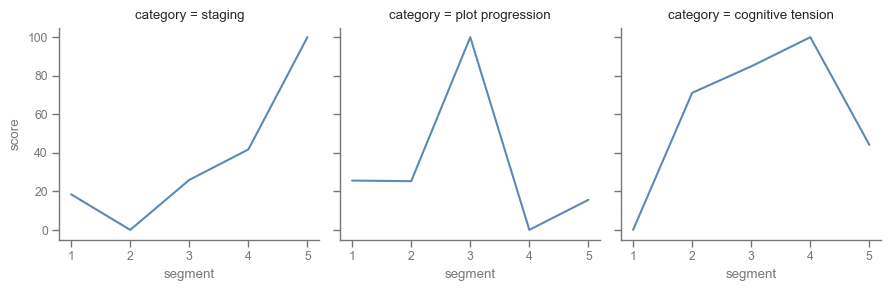

In [14]:
rc = {
 'axes.edgecolor': '#777',
 'axes.labelcolor': '#777',
 'xtick.color': '#777',
 'ytick.color': '#777',
}

sns.set_style('ticks', rc=rc)
sns.set_context('paper')
g = sns.FacetGrid(data=results_plot_df, col="category")
h = g.map(sns.lineplot, "segment", "score", color="#5c89b5", lw=1.5)

Compare your finding to the image below from the paper. How does your narrative compare?

![Narrative Arcs](https://www.science.org/cms/10.1126/sciadv.aba2196/asset/be042a05-d1da-415f-a8ef-fb7397098f68/assets/graphic/aba2196-f1.jpeg)